In [14]:
import brian2 as br
import numpy as np
import pandas as pd
import repro_functions as repro
import scipy.io as sio

In [273]:
fol = r'f:\desktop\Code\Reproducibility\model_ICx\SynchResults\data\out'
group = -160

dataset = sio.loadmat(fol + '\\SynchOut_ITD' + str(group) + '_001.mat')
spikes = dataset['spikesICx']

del fol, dataset

In [274]:
dur = 0.3
cw = 0.0001 * br.second
bins = len(np.arange(0 * br.second, dur * br.second + 0.05 * br.second + cw, cw)) - 1
neurons, reps = np.shape(spikes)

In [275]:
hist = np.ndarray([int(neurons), bins])

for n in range(neurons):
    sp = spikes[n, :]
    sp = [s/1000 for s in sp]
    try:
        hist[n, :] = repro.make_PSTH(np.concatenate(sp, 1), dur * br.second, cw, reps, 0 * br.second)
    except:
        print(str(n))
            
del n, sp, s

In [276]:
# variables
curve_time = 100

rep_out = pd.DataFrame(columns = ['neuron', 'fr', 'curve'])

for n in range(neurons):
    try:
        t, SAC = repro.autocor(hist[n, :] * br.Hz, reps, T=curve_time*br.ms, bin=cw)
        SAC = SAC * br.Hz ** 2
        sp = np.mean(hist[n, :])
    except:
        print(str(n))
        arr = np.arange(-(curve_time * br.ms), (curve_time * br.ms) , cw)
        arr = np.delete(arr, 0)
        arr[:] = np.nan
        SAC = arr
        del arr
        sp = np.nan
        pass
    tmp = {'neuron': n, 'fr':sp, 'curve': SAC}
    rep_out = rep_out.append(tmp, ignore_index = True)
    
del n, t, SAC, sp, tmp

In [277]:
curve = [c for c in rep_out['curve']]

sio.savemat('repro_ITD' + str(group) + '_001_varying.mat', {'curve':curve, 'cw':cw, 'neuron':rep_out['neuron'].tolist(), 'fr':rep_out['fr'].tolist(), 'reps':reps, 'dur':dur})

del curve, c

In [278]:
del bins, curve_time, cw, dur, group, neurons, reps

In [279]:
del hist, spikes

In [280]:
del rep_out

In [160]:
import matplotlib.pyplot as plt

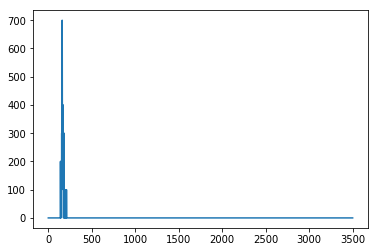

In [87]:
plt.plot(hist[35])